In [ ]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
#import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
from torch.utils.data import DataLoader, Dataset# from utils.helper import fn_plot_torch_hist, fn_plot_confusion_matrix

In [ ]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
# By Pramod Sharma : pramod.sharma@prasami.com

###-----------------
### Import Libraries

###-----------------

import os
import datetime
import sys
# import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

###------------------------------
### Plot Loss Curve using pytorch
###------------------------------
def fn_plot_tf_hist(hist_df):

    '''
    Args:
        hist_df: a dataframe with following ccolumns
            column 0: loss
            column 1: accuracy
            column 2: val_loss
            column 3: val_accuracy
            While plotting columns are accessed by index
            so that even if the column names are different it will not throw exceptions.
    '''

    fig, axes = plt.subplots(1,2 , figsize = (15,6))

    # properties  matplotlib.patch.Patch
    props = dict(boxstyle='round', facecolor='aqua', alpha=0.4)
    facecolor = 'cyan'
    fontsize=12
    CMAP = plt.cm.coolwarm

    # Get columns by index to eliminate any column naming error
    y1 = hist_df.columns[0]
    y2 = hist_df.columns[1]
    y3 = hist_df.columns[2]
    y4 = hist_df.columns[3]

    # Where was min loss
    best = hist_df[hist_df[y3] == hist_df[y3].min()]

    ax = axes[0]

    hist_df.plot(y = [y1,y3], ax = ax, colormap=CMAP)


    # little beautification
    txtFmt = "Loss: \n  train: {:6.4f}\n   test: {:6.4f}"
    txtstr = txtFmt.format(hist_df.iloc[-1][y1],
                           hist_df.iloc[-1][y3]) #text to plot

    # place a text box in upper middle in axes coords
    ax.text(0.3, 0.95, txtstr, transform=ax.transAxes, fontsize=fontsize,
            verticalalignment='top', bbox=props)

    # calculate offset for arroe
    y_min = min(hist_df[y1].min(), hist_df[y3].min())
    y_max = max(hist_df[y1].max(), hist_df[y3].max())
    offset = (y_max-y_min)/10.0

    # Mark arrow at lowest
    ax.annotate(f'Min: {best[y3].to_numpy()[0]:6.4f}', # text to print
                xy=(best.index.to_numpy(), best[y3].to_numpy()[0]), # Arrow start
                xytext=(best.index.to_numpy(), best[y3].to_numpy()[0] + offset), # location of text
                fontsize=fontsize, va='bottom', ha='right',bbox=props, # beautification of text
                arrowprops=dict(facecolor=facecolor, shrink=0.05)) # arrow

    # Draw vertical line at best value
    ax.axvline(x = best.index.to_numpy(), color = 'green', linestyle='-.', lw = 3);

    ax.set_xlabel("Epochs")
    ax.set_ylabel(y1.capitalize())
    ax.set_title('Errors')
    ax.grid();
    ax.legend(loc = 'upper left') # model legend to upper left

    ax = axes[1]

    hist_df.plot( y = [y2, y4], ax = ax, colormap=CMAP)

    # little beautification
    txtFmt = "Accuracy: \n  train: {:6.4f}\n  test:  {:6.4f}"
    txtstr = txtFmt.format(hist_df.iloc[-1][y2],
                           hist_df.iloc[-1][y4]) #text to plot

    # place a text box in upper middle in axes coords
    ax.text(0.3, 0.2, txtstr, transform=ax.transAxes, fontsize=fontsize,
            verticalalignment='top', bbox=props)

    # calculate offset for arroe
    y_min = min(hist_df[y2].min(), hist_df[y4].min())
    y_max = max(hist_df[y2].max(), hist_df[y4].max())
    offset = (y_max-y_min)/10.0

    # Mark arrow at lowest
    ax.annotate(f'Best: {best[y4].to_numpy()[0]:6.4f}', # text to print
                xy=(best.index.to_numpy(), best[y4].to_numpy()[0]), # Arrow start
                xytext=(best.index.to_numpy(), best[y4].to_numpy()[0]-offset), # location of text
                fontsize=fontsize, va='bottom', ha='right',bbox=props, # beautification of text
                arrowprops=dict(facecolor=facecolor, shrink=0.05)) # arrow


    # Draw vertical line at best value
    ax.axvline(x = best.index.to_numpy(), color = 'green', linestyle='-.', lw = 3);

    ax.set_xlabel("Epochs")
    ax.set_ylabel(y2.capitalize())
    ax.grid()
    ax.legend(loc = 'lower left')

    plt.tight_layout()



###----------------------
### Plot confusion matrix
###----------------------
def fn_plot_confusion_matrix(y_true, y_pred, labels):
    '''
    Args:
        y_true: Ground Truth
        y_pred : Predictions
        labels : dictonary
                  {0: 'Goal Keeper',
                  1: 'Defender',
                  2: 'Mid-Fielder',
                  3: 'Forward'}

    '''

    cm  = confusion_matrix(y_true, y_pred)

    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels=labels.values())

    fig, ax = plt.subplots(figsize = (6,6))

    disp.plot(ax = ax, cmap = 'Blues', xticks_rotation = 'vertical', colorbar=False)
    # Disable the grid
    ax.grid(False)

    plt.show();


###------------------------------
### Plot Loss Curve using pytorch
###------------------------------
def fn_plot_torch_hist(hist_df):

    # instantiate figure
    fig, axes = plt.subplots(1,2 , figsize = (15,6))

    # properties  matplotlib.patch.Patch
    props = dict(boxstyle='round', facecolor='cyan', alpha=0.5)

    # columns
    x = hist_df.columns[0]
    y1 = hist_df.columns[1]
    y2 = hist_df.columns[2]
    y3 = hist_df.columns[3]
    y4 = hist_df.columns[4]

    # Where was min loss
    best = hist_df[hist_df[y2] == hist_df[y2].min()]
    best = best.drop_duplicates(subset=y2)
    # pick first axis
    ax = axes[0]

    # Plot all losses
    hist_df.plot(x = x, y = [y1, y2], ax = ax)

    # calculate offset for arroe
    y_min = min(hist_df[y1].min(), hist_df[y2].min())
    y_max = max(hist_df[y1].max(), hist_df[y2].max())
    offset = (y_max-y_min)/10.0

    # little beautification
    txtFmt = "Loss: \n  train: {:6.4f}\n   test: {:6.4f}"
    txtstr = txtFmt.format(hist_df.iloc[-1][y1],
                           hist_df.iloc[-1][y2]) #text to plot

    # place a text box in upper middle in axes coords
    ax.text(0.3, 0.95, txtstr, transform=ax.transAxes, fontsize=14,
            verticalalignment='top', bbox=props)

    # Mark arrow at lowest
    ax.annotate(f'Min: {best[y2].to_numpy()[0]:6.4f}', # text to print
                xy=(best[x].to_numpy(), best[y2].to_numpy()[0]), # Arrow start
                xytext=(best[x].to_numpy()+ offset, best[y2].to_numpy()[0]+offset), # location of text
                fontsize=14,va='bottom', ha='right',bbox=props, # beautification of text
                arrowprops=dict(facecolor='cyan', shrink=0.05)) # arrow

    # Draw vertical line at best value
    ax.axvline(x = best[x].to_numpy(), color = 'green', linestyle='-.', lw = 3);

    ax.set_xlabel(x.title())
    ax.set_ylabel(y1.title())
    ax.set_title('Errors')
    ax.grid()
    ax.legend(loc = 'upper left') # model legend to upper left

    # pick second axis
    ax = axes[1]

    # Plot accuracies
    hist_df.plot(x = x, y = [y3, y4], ax = ax)

    # little beautification
    txtFmt = "Accuracy: \n  train: {:6.4f}\n  test:  {:6.4f}"
    txtstr = txtFmt.format(hist_df.iloc[-1][y3],
                           hist_df.iloc[-1][y4]) #text to plot

    # calculate offset for arroe
    y_min = min(hist_df[y3].min(), hist_df[y4].min())
    y_max = max(hist_df[y3].max(), hist_df[y4].max())
    offset = (y_max-y_min)/10.0

    # place a text box in lower middle in axes coords
    ax.text(0.3, 0.2, txtstr, transform=ax.transAxes, fontsize=12,
            verticalalignment='top', bbox=props)

    # Mark arrow at lowest
    ax.annotate(f'Best: {best[y4].to_numpy()[0]:6.4f}', # text to print
                xy=(best[x].to_numpy(), best[y4].to_numpy()[0]), # Arrow start
                xytext=(best[x].to_numpy()- offset, best[y4].to_numpy()[0]-offset), # location of text
                fontsize=14,va='bottom', ha='right',bbox=props, # beautification of text
                arrowprops=dict(facecolor='cyan', shrink=0.05)) # arrow


    # Draw a vertical line at best value
    ax.axvline(x = best[x].to_numpy(),
               color = 'green',
               linestyle='-.', lw = 3)

    # Labels
    ax.set_xlabel(x.title())
    ax.set_ylabel(y3.title())
    ax.set_title('Accuracies')
    ax.grid();
    ax.legend(loc = 'lower left')

    plt.tight_layout()

## Helper Function
* Import from util.helper

In [ ]:
# Some basic parameters
# inpDir = '../../input'
# outDir = '../output'

RANDOM_STATE = 24
torch.manual_seed(RANDOM_STATE) # Set Random Seed for reproducible  results

EPOCHS = 30 # number of epochs
ALPHA = 0.001 # learning rate
TEST_SIZE = 0.2
BATCH_SIZE = 32

# parameters for Matplotlib
params = {'legend.fontsize': 'medium',
          'figure.figsize': (15, 10),
          'axes.labelsize': 'medium',
          'axes.titlesize':'large',
          'xtick.labelsize':'medium',
          'ytick.labelsize':'medium'
         }

CMAP = plt.cm.Spectral

plt.rcParams.update(params)



```
# This is formatted as code
```

## Read MNIST Fashion data set

In [ ]:
train_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/fashion-mnist_train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/fashion-mnist_test.csv')
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
class_labels = {0: 'T-shirt/top',
          1: 'Trouser',
          2: 'Pullover',
          3: 'Dress',
          4: 'Coat',
          5: 'Sandal',
          6: 'Shirt',
          7: 'Sneaker',
          8: 'Bag',
          9: 'Ankle boot',}

In [ ]:
torch.cuda.is_available()

False

In [ ]:
torch.version.cuda

'12.1'

In [ ]:
# torch.cuda.get_device_name(torch.cuda.current_device())

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [ ]:
# ''' Using singleton desing pattern'''
# class GlobalScaler:
#   _instance = None
#   def __init__(self):
#     if GlobalScaler._instance is not None:
#       raise Exception ("GlobalScaler class is a singleton ")

#     self.scaler=StandardScaler()


#   classmethod
#   def get_instance(cls):
#     if cls._instance is None:
#        cls._instance = GlobalScaler()
#     return  cls._instance

In [ ]:
# globalScaler = GlobalScaler.get_instance()
# globalScaler.scaler

In [ ]:
class FashionDS(Dataset):
  def __init__(self,dataframe:pd.DataFrame, device : str=device,
               ):
      self.df=dataframe
      self.device=device


      self.labels=self.df['label'].to_numpy()
      X= self.df.drop('label',axis=1).to_numpy()

      self.features=X/255# fit transform

  def __len__(self):
    return len(self.features)

  def __getitem__(self, index):
    #Extract features and label from the dataframe
    features = self.features[index]
    label = self.labels[index]

    #Convert to pytorch tensors
    features = torch.tensor(features,
                            dtype = torch.float32,
                            device = device)

    label = torch.tensor(label,
                         dtype = torch.int64,
                         device = self.device)

    return features, label



In [ ]:

train_ds = FashionDS(train_df)

test_ds = FashionDS(test_df)

In [ ]:
train_loader = DataLoader(train_ds,
                          batch_size=BATCH_SIZE,
                          shuffle=True)

test_loader = DataLoader(test_ds,
                          batch_size=BATCH_SIZE,
                          shuffle=True)

In [ ]:
images ,targets=next(iter(train_loader))
images = images.cpu().numpy()
targets = targets.cpu().numpy()
targets

array([7, 6, 4, 0, 4, 2, 8, 8, 3, 7, 3, 8, 7, 8, 3, 2, 9, 1, 9, 4, 0, 4,
       5, 1, 8, 6, 9, 5, 4, 3, 2, 6])

In [ ]:
images , labels = next(iter(test_loader))
outputs = net(images)
preds = torch.argmax(outputs, dim=1)

preds = preds.cpu().numpy()
labels = labels.cpu().numpy()

images = images.cpu().numpy()

print(preds, labels, outputs)

[3 0 9 4 6 0 1 7 8 0 2 4 5 6 1 5 1 8 5 5 9 6 2 7 6 9 7 5 3 5 5 2] [8 0 7 3 6 6 1 7 8 0 2 4 5 6 1 5 1 8 5 5 5 6 8 7 6 5 7 5 3 5 5 2] tensor([[-4.2942e+00, -8.5379e+00, -5.0312e+00, -2.1570e-01, -5.1648e+00,
         -1.3201e+01, -4.9221e+00, -9.2230e+00, -1.8292e+00, -1.3881e+01],
        [-5.3422e-02, -6.6217e+00, -6.6126e+00, -7.4293e+00, -7.9130e+00,
         -1.2431e+01, -3.0293e+00, -1.2233e+01, -1.0572e+01, -1.4426e+01],
        [-7.8501e+00, -7.7280e+00, -8.0931e+00, -7.1150e+00, -8.4888e+00,
         -6.1568e+00, -6.6273e+00, -1.2625e+00, -6.9730e+00, -3.4175e-01],
        [-5.4424e+00, -4.8458e+00, -2.4167e+00, -1.6412e+00, -4.4088e-01,
         -7.2054e+00, -2.8487e+00, -1.2075e+01, -8.0519e+00, -6.0368e+00],
        [-4.8971e+00, -1.4006e+01, -4.4569e+00, -6.8099e+00, -4.9762e+00,
         -9.6811e+00, -2.8308e-02, -1.1378e+01, -7.1978e+00, -1.0835e+01],
        [-3.5438e-01, -6.7594e+00, -5.1450e+00, -3.8069e+00, -5.1830e+00,
         -1.5691e+01, -1.3472e+00, -1.1504e+01, -

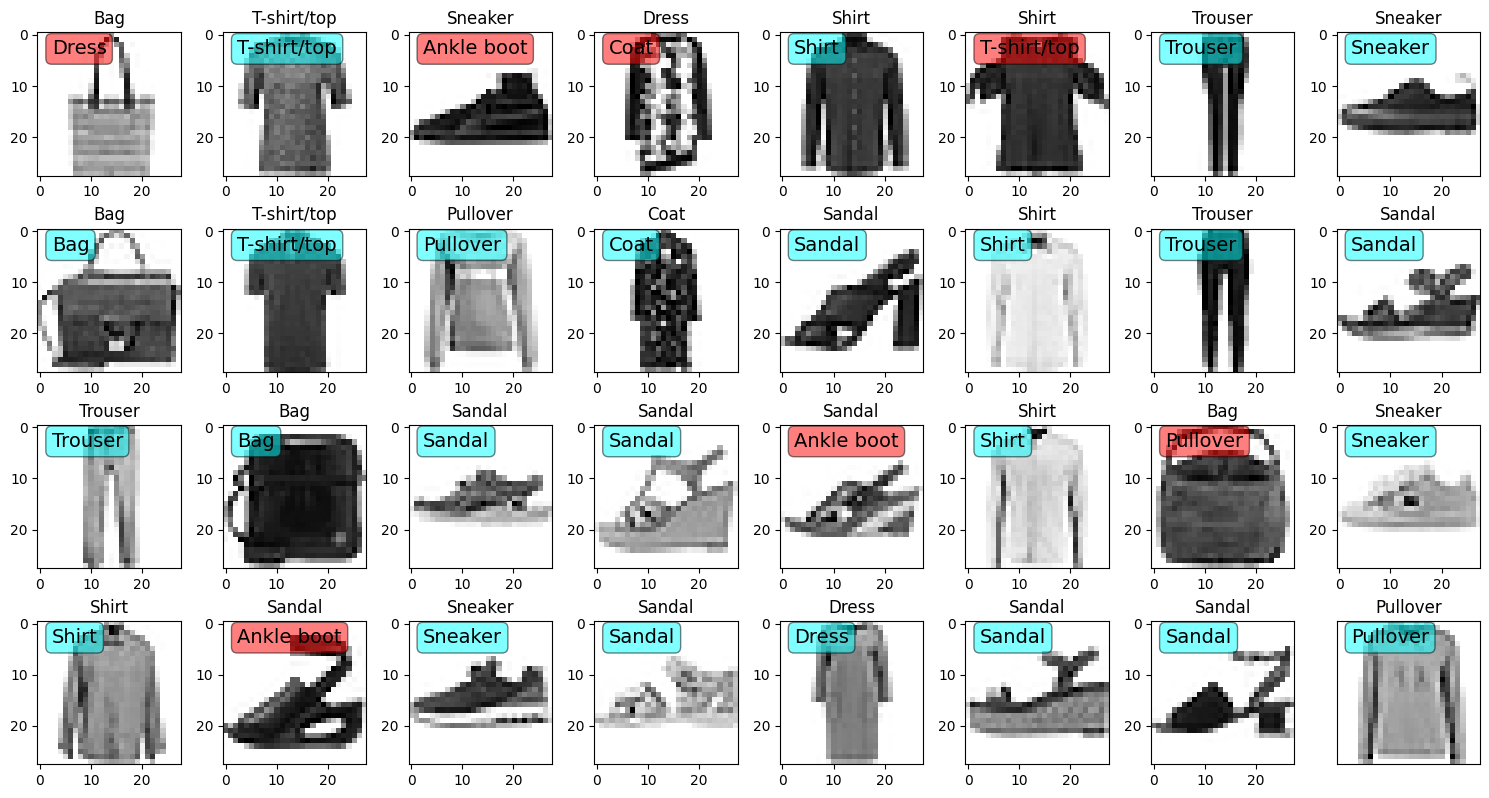

In [ ]:
fig,axes = plt.subplots(4,8, figsize=(15,8)) #Instantiate
axes = axes.ravel() #1D array

for i in range(BATCH_SIZE):
  ax = axes[i] #extract axis on which to plot

  #properties matplotlib.patch.Patch
  color = 'cyan'
  if labels[i] != preds[i]:
    color='red'
  ax.imshow(images[i].reshape(28,28),cmap=plt.cm.binary)

  plt.xticks([])

  plt.yticks([])

  ax.grid(False)

  ax.set_title(class_labels[labels[i]])

  props  = dict(boxstyle='round', facecolor=color, alpha=0.5)

  #place a text in the textbox in the upper middle in axes coords
  ax.text(0.1,0.95, class_labels[preds[i]], transform=ax.transAxes, fontsize=14, verticalalignment='top', bbox=props)

  plt.tight_layout()

In [ ]:
input_shape = train_df.shape[1]-1
input_shape

784

In [ ]:
class Model(nn.Module):

    def __init__(self, input_dim):
        super(Model, self).__init__()

        #Define dropout rates
        self.dor1 = 0.2
        self.dor2 = 0.3

        #Layer 1
        self.layer1 = nn.Linear(input_dim,128) #784 X 128 --> making ~ 6 divisions
        self.bn1 = nn.BatchNorm1d(128)
        self.activ1 = nn.Tanh()
        self.dropout1 = nn.Dropout(self.dor1)

        #Layer 2
        self.layer2 = nn.Linear(128, 32) #128 X 32 --> making 4 divisions
        self.bn2 = nn.BatchNorm1d(32)
        self.activ2 = nn.Tanh()
        self.dropout2 = nn.Dropout(self.dor2)

        self.layer3 = nn.Linear(32, 10) #32 X 10 --> making ~ 3 divisions
        self.softmax = nn.LogSoftmax(dim = 1)

    def forward(self, x):
        x = self.layer1(x)
        x = self.bn1(x)
        x = self.activ1(x)
        x = self.dropout1(x)

        x = self.layer2(x)
        x = self.bn2(x)
        x = self.activ2(x)
        x = self.dropout2(x)

        x = self.layer3(x)
        return self.softmax(x)

net = Model(input_dim=input_shape).to(device) # Create model on GPU
print (net)

Model(
  (layer1): Linear(in_features=784, out_features=128, bias=True)
  (bn1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (activ1): Tanh()
  (dropout1): Dropout(p=0.2, inplace=False)
  (layer2): Linear(in_features=128, out_features=32, bias=True)
  (bn2): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (activ2): Tanh()
  (dropout2): Dropout(p=0.3, inplace=False)
  (layer3): Linear(in_features=32, out_features=10, bias=True)
  (softmax): LogSoftmax(dim=1)
)


In [ ]:
# Define the loss function and optimizer
loss_fn = nn.CrossEntropyLoss() # cross entropy loss

loss, tloss = [],[]
acc, tacc = [],[]
n_epoch = []

optimizer = torch.optim.Adam(net.parameters(),
                             lr=ALPHA,
                             weight_decay=1e-5) #weight decay(l2 penalty)

# Train the model for multiple epochs

for epoch in range(EPOCHS):

    # Training loop
    train_loss = 0.0
    train_acc = 0.0

    for i, data in enumerate(train_loader):

        inputs, labels = data

        optimizer.zero_grad()

        outputs = net(inputs)

        preds = torch.argmax(outputs, dim = 1)

        batch_loss = loss_fn(outputs, labels)
        batch_acc = accuracy_score(labels.cpu().numpy(), preds.cpu().numpy())

        batch_loss.backward()

        optimizer.step()

        train_loss += batch_loss.item() * inputs.size(0)
        train_acc += batch_acc * inputs.size(0)

    train_loss /= len(train_ds)
    train_acc /= len(train_ds)

    loss.append(train_loss)
    acc.append(train_acc)

    # Testing loop
    test_loss = 0.0
    test_acc = 0.0

    with torch.no_grad():

        for data in test_loader:

            inputs, labels = data

            outputs = net(inputs)

            preds = torch.argmax(outputs, dim = 1)

            batch_loss = loss_fn(outputs, labels)

            batch_acc = accuracy_score(labels.cpu().numpy(), preds.cpu().numpy())

            test_loss += batch_loss.item() * inputs.size(0)
            test_acc += batch_acc* inputs.size(0)

        test_loss /= len(test_ds)
        test_acc /= len(test_ds)

        tloss.append(test_loss)
        tacc.append(test_acc)
    n_epoch.append(epoch)

    if epoch%5 == 0:
        print(f'At epoch {epoch} | Loss - train:{train_loss:.4f}, test:{test_loss:.4f} | Acc - train:{train_acc:.4f}, test:{test_acc:.4f}')

At epoch 0 | Loss - train:0.6145, test:0.4999 | Acc - train:0.8005, test:0.8307
At epoch 5 | Loss - train:0.4084, test:0.4396 | Acc - train:0.8552, test:0.8489
At epoch 10 | Loss - train:0.3659, test:0.4268 | Acc - train:0.8719, test:0.8520
At epoch 15 | Loss - train:0.3455, test:0.3972 | Acc - train:0.8775, test:0.8641
At epoch 20 | Loss - train:0.3285, test:0.4109 | Acc - train:0.8828, test:0.8617
At epoch 25 | Loss - train:0.3112, test:0.3982 | Acc - train:0.8893, test:0.8635


In [ ]:
loss_df = pd.DataFrame({'epoch' : n_epoch, 'loss' : loss, 'test_loss': tloss, 'acc' : acc, 'test_acc': tacc})
loss_df.head()

,epoch,loss,test_loss,acc,test_acc
0,0,0.614492,0.499863,0.800483,0.8307
1,1,0.483271,0.482433,0.832183,0.8341
2,2,0.452116,0.469234,0.841283,0.8391
3,3,0.432685,0.436481,0.848383,0.8495
4,4,0.420894,0.439966,0.851783,0.8460


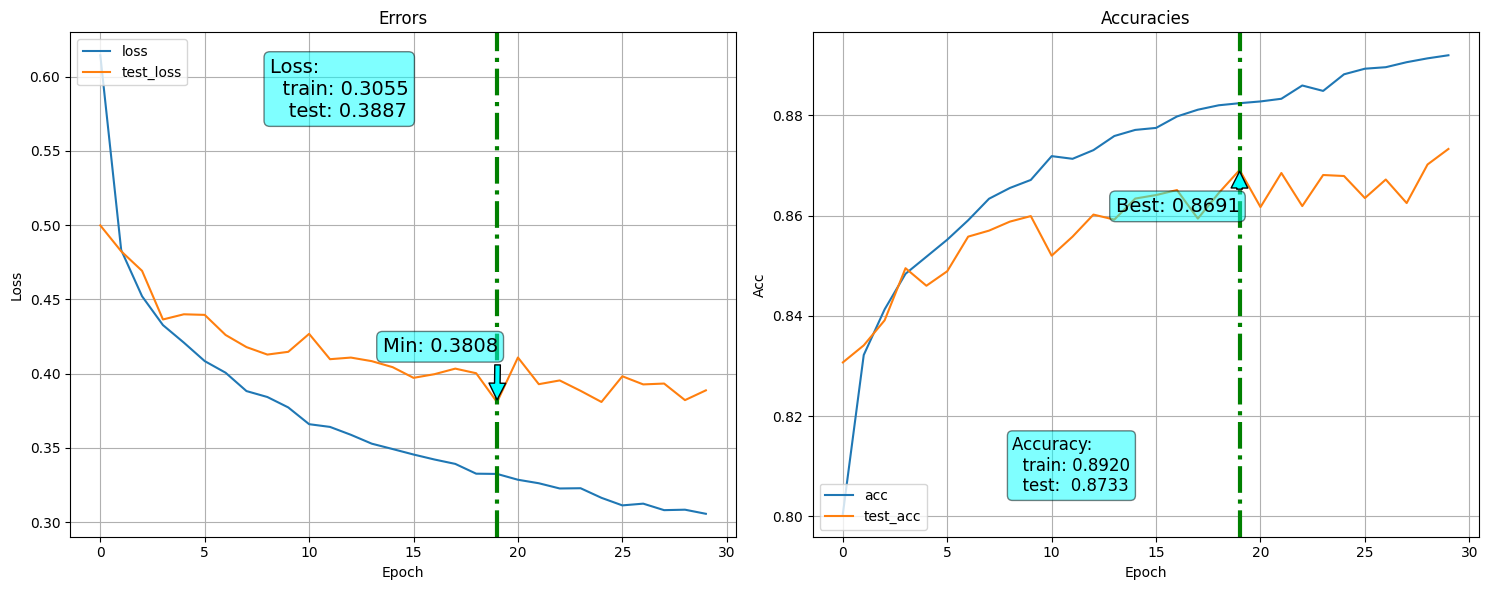

In [ ]:
fn_plot_torch_hist(loss_df)

In [ ]:
y_train = []
y_pred = []
for i, data in enumerate(train_loader):

    inputs, labels = data

    outputs = net(inputs)

    preds = torch.argmax(outputs, dim = 1)

    y_train.extend(labels.cpu().numpy())

    y_pred.extend(preds.cpu().numpy())

In [ ]:
X = train_df.drop('label', axis=1).to_numpy()/255.
X = torch.tensor(X,dtype=torch.float32).to(device)
X.shape

torch.Size([60000, 784])

In [ ]:
with torch.inference_mode():
  preds = net(X)
  y_pred = preds.argmax(dim=1)
  y_pred = y_pred.cpu().numpy()
y_pred.shape

(60000,)

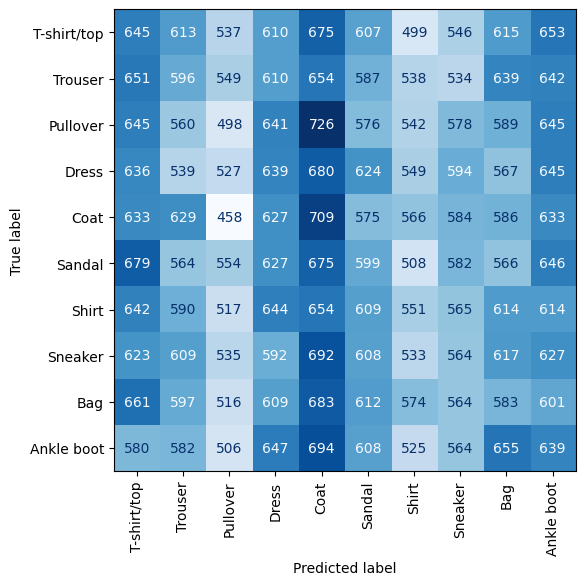

In [ ]:
fn_plot_confusion_matrix(y_train,y_pred,class_labels)

In [ ]:
print(classification_report(y_train,y_pred))

In [ ]:
cm  = confusion_matrix(y_train, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=class_labels.values())

fig, ax = plt.subplots(figsize = (4,4))

disp.plot(ax = ax, cmap = 'Blues', xticks_rotation = 'vertical', colorbar=False)

plt.show();

In [ ]:
y_test = []
y_pred = []
for i, data in enumerate(test_loader):

    inputs, labels = data

    outputs = net(inputs)

    preds = torch.argmax(outputs, dim = 1)

    y_test.extend(labels.cpu().numpy())

    y_pred.extend(preds.cpu().numpy())

In [ ]:
print(classification_report(y_test, y_pred ))

! Voila prediction matches with the ground truth.

Lets add some tracking too.

In [ ]:
cm  = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=class_labels.values())

fig, ax = plt.subplots(figsize = (4,4))

disp.plot(ax = ax, cmap = 'Blues', xticks_rotation = 'vertical', colorbar=False)

plt.show();